# Program to Feature Generation and Feature Selection.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer = load_breast_cancer()

# Create a Pandas dataframe from the dataset
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

# Feature Generation - create a new feature representing the ratio of mean texture to mean perimeter
X_train['texture_perimeter_ratio'] = X_train['mean texture'] / X_train['mean perimeter']
X_test['texture_perimeter_ratio'] = X_test['mean texture'] / X_test['mean perimeter']

# Feature Selection - select the top 10 features using ANOVA F-test
selector = SelectKBest(f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model on the selected features
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print(f"Accuracy on test set: {score:.3f}")

Accuracy on test set: 0.965


## 6. Program for hierarchical agglomerative clustering, k-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


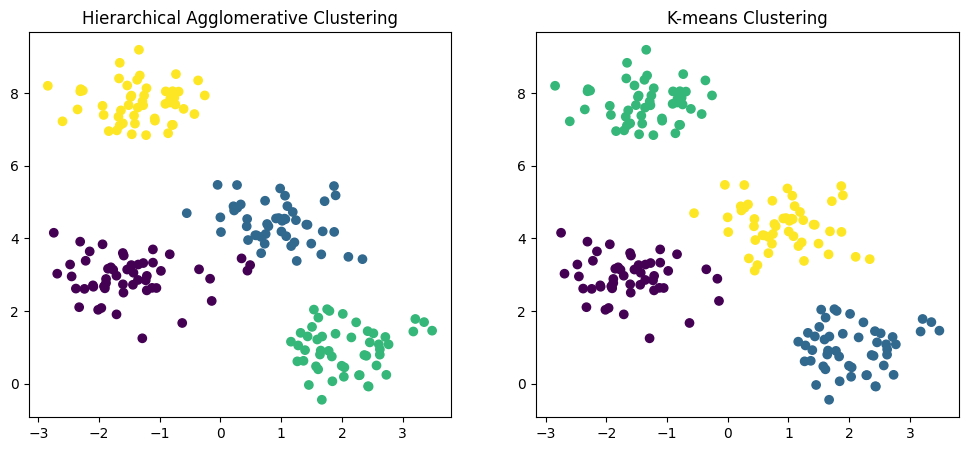

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans

# Generate random data
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

# Hierarchical Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(X)

# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hierarchical Agglomerative Clustering
axes[0].scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
axes[0].set_title("Hierarchical Agglomerative Clustering")

# K-means Clustering
axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axes[1].set_title("K-means Clustering")

plt.show()

In this program, we first generate a random dataset using the make_blobs function from scikit-learn. We create two clusters with 4 centers and a standard deviation of 0.6.

Then, we perform hierarchical agglomerative clustering using the AgglomerativeClustering class and K-means clustering using the KMeans class from scikit-learn.

Finally, we plot the results using matplotlib, where each cluster is represented by a different color.

we generate a new feature for demonstration purposes by adding the values of the first two features. We combine this new feature with the original features using np.column_stack().

To perform feature selection, we use the chi-square test as the scoring function in SelectKBest(). We specify k=10 to select the top 10 features. We transform the training and testing data using the selected features.

Next, we perform Feature Generation by creating a new feature representing the ratio of mean texture to mean perimeter. We then perform Feature Selection using ANOVA F-test to select the top 10 features. We scale the data using StandardScaler and train a logistic regression model on the selected features.